In [3]:
from tensorflow_addons.metrics import F1Score
from tensorflow.python.ops.losses.losses_impl import softmax_cross_entropy
from keras_nlp.layers import TransformerEncoder

import keras.models

model_path = '../trainings/22-10-20_18-58-41/model'
model = keras.models.load_model(model_path,custom_objects={'TransformerEncoder':TransformerEncoder,'softmax_cross_entropy':softmax_cross_entropy,'F1Score':F1Score})
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9, 17)]           0         
                                                                 
 dense (Dense)               (None, 9, 20)             360       
                                                                 
 transformer_encoder (Transf  (None, 9, 20)            2600      
 ormerEncoder)                                                   
                                                                 
 flatten (Flatten)           (None, 180)               0         
                                                                 
 dense_1 (Dense)             (None, 40)                7240      
                                                                 
 dense_2 (Dense)             (None, 3)                 123       
                                                             

In [4]:
import numpy as np

x_test = np.load('../splits/test/x_preprocessed.npy')
y_test = np.load('../splits/test/y_preprocessed.npy')
print(x_test.shape)
y_test.shape

(185, 9, 17)


(185, 3)

(185, 9, 20)
(1665, 20)


D:\Egyetem\7.Semester\CryptoPredictions\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\Egyetem\7.Semester\CryptoPredictions\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1665, 2)


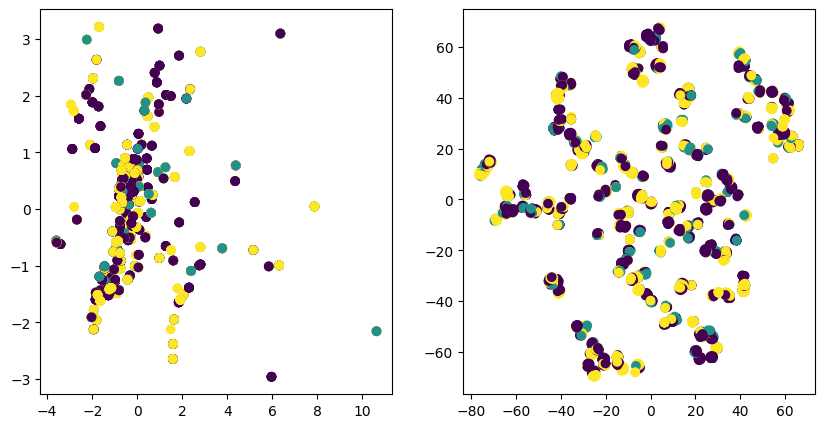

In [5]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


def viz_embeddings(layer,x_test,y_test):
    preds = layer(x_test)
    by_sample = np.reshape(preds,(preds.shape[0]*preds.shape[1],preds.shape[2]))
    print(preds.shape)
    print(by_sample.shape)
    classes = np.argmax(y_test,axis=1)
    colors = [[class_id]*x_test.shape[1] for class_id in classes]
    colors = np.array(colors).flatten()
    pca = PCA(n_components=2).fit_transform(by_sample)
    tsne = TSNE(n_components=2).fit_transform(by_sample)
    print(pca.shape)

    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

    axes[0].scatter(*zip(*pca),c=colors)
    axes[1].scatter(*zip(*tsne),c=colors)

viz_embeddings(model.get_layer('dense'),x_test,y_test)

### Embedding visualization

In [38]:
from models.transformers import create_encoder_block
inputs_test = x_test.reshape((x_test.shape[0],-1,1))
model = create_encoder_block(inputs_test,3)
model.load_weights(r'../trainings/22-10-20_23-26-22/model.h5')

In [41]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 153, 1)]     0           []                               
                                                                                                  
 tf.reshape_4 (TFOpLambda)      (None, 1)            0           ['input_3[0][0]']                
                                                                                                  
 tf.compat.v1.shape_2 (TFOpLamb  (3,)                0           ['input_3[0][0]']                
 da)                                                                                              
                                                                                                  
 tf.linalg.matmul_2 (TFOpLambda  (None, 10)          0           ['tf.reshape_4[0][0]']     

In [ ]:
embeddings =

In [36]:
att = model.get_layer('encoder_0')._multi_head_attention_layer
output_tensor,weights = att(embeddings,embeddings,return_attention_scores=True,training=False)

[<tf.Variable 'encoder_0/multi_head_attention/query/kernel:0' shape=(11, 2, 5) dtype=float32, numpy=
 array([[[-0.23576854,  0.25028703,  0.21577244,  0.41006896,
           0.35016742],
         [-0.01251491, -0.07142422,  0.6038204 ,  0.5707638 ,
          -0.61148876]],
 
        [[ 0.5935199 , -0.04868256,  0.18331124, -0.4340517 ,
           0.47905526],
         [-0.14310955, -0.44137704,  0.17028706,  0.35618657,
           0.46854118]],
 
        [[ 0.15507998, -0.5908759 ,  0.22494055,  0.16977297,
           0.21931604],
         [-0.01292477, -0.40134877,  0.36207342,  0.13396975,
           0.11910389]],
 
        [[ 0.02446423, -0.10266682,  0.5255848 , -0.38400677,
          -0.18991923],
         [ 0.19774598, -0.06402643, -0.3493809 , -0.39574325,
          -0.16707906]],
 
        [[-0.13634162, -0.07002228,  0.02554502, -0.03581425,
           0.63547564],
         [-0.1561794 ,  0.29161048, -0.32018152,  0.32323056,
          -0.1878192 ]],
 
        [[-0.1706668 , -

In [11]:
att_layer = model.get_layer('transformer_encoder')._multi_head_attention_layer
output_tensor,weights = att_layer(embeddings,embeddings,return_attention_scores=True,training=False)
weights.shape

TensorShape([185, 2, 9, 9])

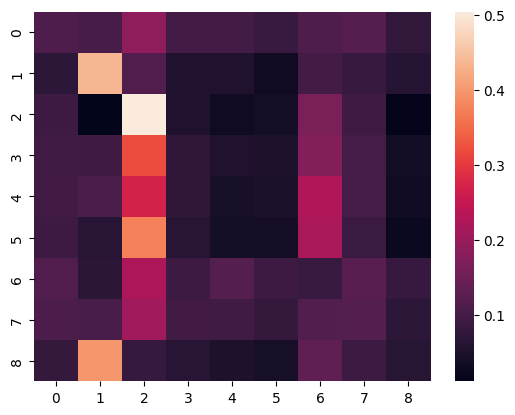

In [13]:
import seaborn as sns
ax = sns.heatmap(weights[3][1])
plt.show()

In [20]:
averaged_attentions = np.average(weights.numpy(),axis=0)

<AxesSubplot:>

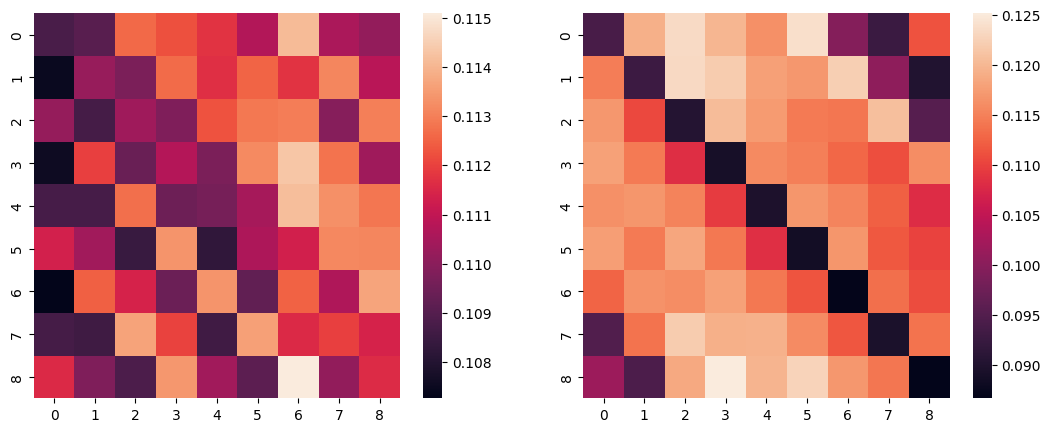

In [27]:
import seaborn as sns
fig,axes = plt.subplots(ncols=2,figsize=(13,5))
sns.heatmap(averaged_attentions[0],ax = axes[0])
sns.heatmap(averaged_attentions[1],ax = axes[1])